<a href="https://colab.research.google.com/github/ahvblackwelltech/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Ahvi_Blackwell_LS_DSPT4_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats, ttest_rel

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-11-22 12:53:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-11-22 12:53:48 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
# Create dataframe
column_headers = ['party','handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid','religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration','synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']

In [0]:
df = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')

In [5]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df = df.replace({'n': 0, 'y': 1})

In [7]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [8]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [9]:
df = df.fillna(method='ffill')
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [11]:
rep['education'].shape

(168,)

In [12]:
rep['education'].head(10)

0     1.0
1     1.0
7     0.0
8     1.0
10    0.0
11    0.0
14    1.0
15    1.0
18    0.0
28    1.0
Name: education, dtype: float64

In [13]:
df.head(10)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
import scipy.stats as stats

In [15]:
# Build for confidence interval
confidence_interval_data = df['education']
np.isnan(confidence_interval_data)
con_idn = confidence_interval_data[~np.isnan(confidence_interval_data)]
print(con_idn.shape)
print(con_idn.isnull().sum())

# Function for confidence interval
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  s = len(data)
  stdrd = np.std(data, ddof=1) / np.sqrt(s)
  mo = stdrd * stats.t.ppf((1 + confidence) / 2.0, s - 1)
  return (mean, mean - mo, mean + mo)

print(confidence_interval(con_idn))


(435,)
0
(0.4091954022988506, 0.3628076477630262, 0.455583156834675)


In [16]:
rep_edu = rep['education']
np.array(rep_edu)

array([1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.])

In [0]:
# mean_rep = confidence_interval(rep_edu)[0]
# lower_bound = confidence_interval(rep_edu)[1]
# upper_bound = confidence_interval(rep_edu)[2]
# print(confidence_interval(rep_edu))

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns 

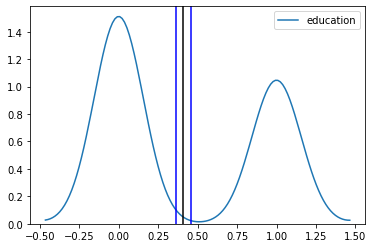

In [19]:
# Creating a plot to give visual of the confidence interval
sns.kdeplot(con_idn);
ci = confidence_interval(con_idn)

### kde estimate density

# lower_bound
plt.axvline(x = ci[1], color='blue');
# upper_bound
plt.axvline(x = ci[2], color='blue');
# mean_rep
plt.axvline(x = ci[0], color='black');

In [20]:
print(con_idn.mean())

0.4091954022988506


In [21]:
con_idn = np.array(con_idn.to_list())
sam_con_idn_mean = []
for x in range(0,600):
  sam_con_idn = np.random.choice(con_idn, size=10)
  sam_con_idn_mean.append(sam_con_idn.mean())
print(len(sam_con_idn_mean))

600


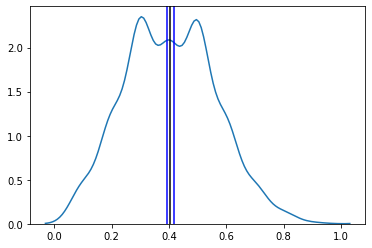

In [22]:
sns.kdeplot(sam_con_idn_mean);
ci = confidence_interval(sam_con_idn_mean)
plt.axvline(x = ci[1], color='blue');
plt.axvline(x = ci[2], color='blue');
plt.axvline(x = ci[0], color='black');

### Chi-Squared

In [0]:
## I decided to switch from using the house vote dataset 
## to the adult dataset because to me it fits.

column_headers = ['Age','Workclass','FNLWGT', 'Education', 'Education-Num', 
                  'Marital-Status', 'Occupation', 'Relationship', 'Race',
                  'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week',
                  'Native-Country', 'Income']

In [0]:
df_chisq = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=column_headers)

In [25]:
df_chisq.head(5)

,Age,Workclass,FNLWGT,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
# 48842, 14
df_chisq.shape

(32561, 15)

In [27]:
df_chisq.dtypes

Age                int64
Workclass         object
FNLWGT             int64
Education         object
Education-Num      int64
Marital-Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
Hours-Per-Week     int64
Native-Country    object
Income            object
dtype: object

In [28]:
df_chisq.isnull().sum()

Age               0
Workclass         0
FNLWGT            0
Education         0
Education-Num     0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-Per-Week    0
Native-Country    0
Income            0
dtype: int64

In [0]:
from scipy.stats import chisquare, ttest_ind, ttest_ind_from_stats, ttest_rel
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# When it comes to this crosstab, it confirms that 
pd.crosstab(df_chisq['Income'], df_chisq['Sex'])

Sex,Female,Male
Income,,
<=50K,9592,15128
>50K,1179,6662


In [0]:
sex_income_ctchi = pd.crosstab(df_chisq['Income'], df_chisq['Sex'], margins=True, margins_name='Total')

In [32]:
sex_income_ctchi

Sex,Female,Male,Total
Income,,,
<=50K,9592,15128,24720
>50K,1179,6662,7841
Total,10771,21790,32561


In [33]:
chisquare(pd.crosstab(df_chisq['Income'], df_chisq['Sex']), axis=None)

Power_divergenceResult(statistic=12478.787844353674, pvalue=0.0)

In [54]:
# Using Numpy
cont_table = sex_income_ctchi
print(cont_table)
print(cont_table.shape)

row_sum = cont_table.iloc[0:2, 3].values
col_sum = cont_table.iloc[2, 0:3].values
print(row_sum)
print(col_sum)

total = cont_table.loc['Total','Total']
print(total)

Sex      Female   Male  Total
Income                       
 <=50K     9592  15128  24720
 >50K      1179   6662   7841
Total     10771  21790  32561
(3, 3)


IndexError: ignored

In [55]:
# Complete Results
result = []
for i in range(len(row_sum)):
  result_row = []
  for column in col_sum:
    result_value = column * row_sum[i] / total
    result_row.append(result_value)
  result.append(result_row)

results = np.array(result)
print(results.shape)
print

(3, 2, 3)


<function print>

In [56]:
# Chi-Squared method
observed = pd.crosstab(df_chisq['Education'], df_chisq['Sex']).values
observed

array([[ 295,  638],
       [ 432,  743],
       [ 144,  289],
       [  46,  122],
       [  84,  249],
       [ 160,  486],
       [ 144,  370],
       [ 421,  646],
       [ 500,  882],
       [1619, 3736],
       [  86,  327],
       [3390, 7111],
       [ 536, 1187],
       [  16,   35],
       [  92,  484],
       [2806, 4485]])

In [57]:
chi_squared = ((observed - result) ** 1 / (result)).sum()
print(f"Chi-Squared: {chi_squared}")

ValueError: ignored

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)